## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

#### Important notes:

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

### S1: Filtering the data
- Load MNIST FASHION dataset (hint: use the practice notebook)
- Select a training set with the first n=100 samples from each category
- Select a testing set with the first n=100 samples from each category
- Create a numpy matrix named mat_avg defined as:
  A 10 x 2 matrix with the average intensity of all images in each category for the training and testing sets (rows: 10 categories, columns: average intensity in train set,  average intensity in test set)

Q1.1: Which category has the largest average intensity value in training data:   ___

Q1.2: Which category has the largest average intensity value in testing data:   ___

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
## Read data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('Fashion-MNIST', version=1)
mnist.target = mnist.target.astype(np.int32)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
from sklearn.model_selection import train_test_split
X_tr, X_te, Y_tr, Y_te  = train_test_split(mnist.data, mnist.target, random_state=42)

In [7]:
X_tr = np.array(X_tr)
X_te = np.array(X_te)
Y_tr = np.array(Y_tr)
Y_te = np.array(Y_te)

In [8]:
## Select 100 samples for each category from training data
sel_ind = []
NUM_SEL = 100
list_cat = np.unique(Y_tr)
num_cat = list_cat.shape[0]
for tmp_cat in list_cat:
  sel_tmp = list(np.where(Y_tr == tmp_cat)[0])
  sel_ind = sel_ind + sel_tmp[0: NUM_SEL]
sel_ind = np.sort(sel_ind)

X2_tr = X_tr[sel_ind, :]
Y2_tr = Y_tr[sel_ind]

In [9]:
## Select 100 samples for each category from testing data
sel_ind = []
NUM_SEL = 100
list_cat = np.unique(Y_tr)
num_cat = list_cat.shape[0]
for tmp_cat in list_cat:
  sel_tmp = list(np.where(Y_te == tmp_cat)[0])
  sel_ind = sel_ind + sel_tmp[0: NUM_SEL]
sel_ind = np.sort(sel_ind)

X2_te = X_te[sel_ind, :]
Y2_te = Y_te[sel_ind]

In [10]:
## Check selected labels
print(np.unique(Y2_tr, return_counts=True))
print(X2_tr.shape)
print(Y2_tr.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))
(1000, 784)
(1000,)


In [11]:
## Create a numpy matrix named mat_avg
mat_avg = np.zeros([num_cat, 2])

In [12]:
for i, tmp_cat in enumerate(list_cat):
  sel_tmp = X_tr[Y_tr==tmp_cat, :]
  mean_tmp = sel_tmp.mean()
  mat_avg[i, 0] = mean_tmp
print(mat_avg)

[[83.12113446  0.        ]
 [57.03558168  0.        ]
 [95.91654923  0.        ]
 [66.31442038  0.        ]
 [98.46005254  0.        ]
 [35.01927473  0.        ]
 [84.75873968  0.        ]
 [42.82979443  0.        ]
 [89.96690849  0.        ]
 [76.78498706  0.        ]]


## List Categories
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [40]:
cat_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### S2: Finding the average image
- Find and display a single average image of all shoes (categories 'Sandal', 'Sneaker', 'Ankle boot') in training and testing data (use the smaller sample you created)

In [13]:
## Create an "average image" for each category
mat_avg_img = np.zeros([num_cat, X2_tr.shape[1]])
for i, tmp_cat in enumerate(list_cat):
  sel_tmp = X2_tr[Y2_tr==tmp_cat, :]
  mean_tmp = sel_tmp.mean(axis=0)
  mat_avg_img[i, :] = mean_tmp
print(mat_avg_img.shape)

(10, 784)


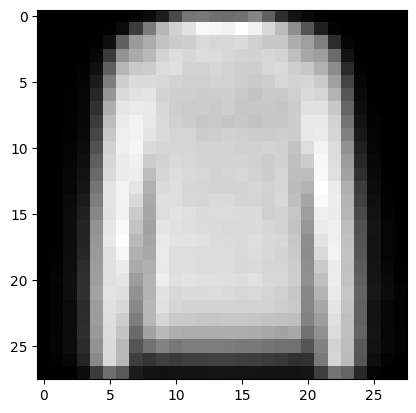

In [14]:
## Show an average image
import matplotlib.pyplot as plt

tmp_cat = 2
tmp_img = mat_avg_img[tmp_cat, :].reshape(28,28)
plt.imshow(tmp_img, cmap='gray')

In [15]:
## Create an "average image" for all shoes
list_shoe_cat = [5, 7, 9]
ind_shoes = np.where(np.isin(Y2_tr, list_shoe_cat) == True)[0]

In [16]:
ind_shoes.shape

(300,)

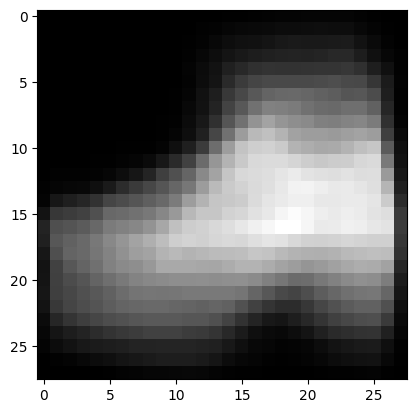

In [17]:
shoe_img_mat = X2_tr[ind_shoes, :]
shoe_img_avg = shoe_img_mat.mean(axis=0)
shoe_img_avg_2d = shoe_img_avg.reshape(28,28)
plt.imshow(shoe_img_avg_2d, cmap='gray')

### S3: Image distances
In the training set, find the shoe image that is most dissimilar from the mean shoe image. Show it as a 2D image
In the training set, find the shoe image that is most similar from the mean shoe image. Show it as a 2D image
Do the same for the testing set
Hint: You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | )

Q3.1: What is the index of most similar shoe image in the training set: ___

Q3.2: What is the index of most dissimilar shoe image in the training set: ___

Q3.1: What is the index of most dissimilar shoe image in the testing set: ___


In [18]:
## Create an array to keep distance to average shoe image
num_img = shoe_img_mat.shape[0]
mat_dist = np.zeros([num_img])

In [19]:
for i in np.arange(0, num_img):
  dist_tmp = np.linalg.norm(shoe_img_mat[i,:] - shoe_img_avg)
  mat_dist[i] = dist_tmp

In [20]:
mat_dist.argsort()

array([229, 122,  27, 233,  67,  87, 150, 158, 102,  32,  40, 118, 160,
       172, 257,  85,  70, 149, 220,  78,  59, 108,  49, 248,  38, 255,
        68, 143, 124, 179, 231, 236, 262,   3, 162, 181, 155,  12,  97,
       195, 271,  35,  52, 157,  90, 200, 293, 254, 177, 145, 194, 163,
        80, 213, 190, 107, 289, 126, 291, 146,  29, 253, 203,  71, 221,
       273,  81, 138, 212,  84,  19,  30,  37, 207, 230, 165,  75, 260,
       214,   6, 256,  57, 209,  31, 116,  15, 112, 127, 197, 164, 128,
       174, 120,  47, 134, 136, 103,  74,  89,  58, 243, 252,  66, 226,
       240, 232, 169, 119,  77,  99, 282, 184, 292, 170,  92, 133, 251,
        65,  69,  10, 239,  54, 294,  83,  26,  34, 189, 111, 290, 246,
       192,  63, 205,  64, 182,  91, 283, 129, 210, 153, 105, 237, 101,
        93, 188, 187, 204, 109, 142,  43, 247,  51, 218,  28, 104, 227,
       284, 137, 259,  24, 114,  55, 266,  44, 281,  23,  73, 199, 140,
       148, 191, 147, 270, 135, 228, 154,   5, 123,  14, 295, 16

In [21]:
## Find most/least similar images
ind_min_dist = mat_dist.argsort()[0]
ind_max_dist = mat_dist.argsort()[-1]
ind_min_dist

229

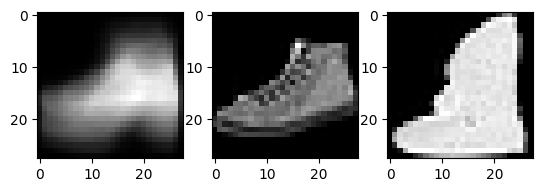

In [22]:
## Show images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(shoe_img_avg_2d, cmap='gray')
axes[1].imshow(shoe_img_mat[ind_min_dist].reshape(28,28), cmap='gray')
axes[2].imshow(shoe_img_mat[ind_max_dist].reshape(28,28), cmap='gray')

### S4: Train a classifier to differentiate shoes from no-shoes
- Create new labels for train and test images as shoes (1) or no-shoes (0)
- Train 2 different classifiers on the training set (SVM and Random Forest). Apply the classifiers on the testing data
- Display the confusion matrix of each classifier
- Display 4 images that are mis-classified as shoes by each classifier

Q1.1: What is the testing accuracy of each classifier:   ___

Q1.2: What is the category (original label) that is most frequently mis-classified as a shoe:   ___

Q1.3: What is the category (original label) that is most frequently mis-classified as a non-shoe:   ___


In [51]:
## All classes classifier

from sklearn import svm

# Create the svm classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model
clf.fit(X2_tr, Y2_tr)

# Predict the label
y_pred = clf.predict(X2_te)

In [52]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(Y2_te, y_pred))

Accuracy:  0.793


In [54]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y2_te, y_pred)

array([[84,  0,  0,  1,  0,  0, 15,  0,  0,  0],
       [ 3, 93,  2,  1,  0,  0,  0,  0,  1,  0],
       [ 3,  0, 74,  0, 15,  0,  7,  0,  1,  0],
       [ 9,  6,  0, 79,  3,  0,  3,  0,  0,  0],
       [ 0,  0, 15,  6, 64,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 87,  0,  6,  1,  4],
       [20,  0, 18,  1, 11,  0, 48,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  5,  0, 90,  0,  5],
       [ 4,  0,  1,  0,  1,  2,  0,  2, 90,  0],
       [ 0,  0,  0,  1,  0,  4,  1,  8,  2, 84]])

In [28]:
Y2_shoe_tr = np.isin(Y2_tr, list_shoe_cat).astype(int)
Y2_shoe_te = np.isin(Y2_te, list_shoe_cat).astype(int)


In [30]:
## Shoes classifier

## Update labels
Y2_shoe_tr = np.isin(Y2_tr, list_shoe_cat).astype(int)
Y2_shoe_te = np.isin(Y2_te, list_shoe_cat).astype(int)

# Create the svm classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model
clf.fit(X2_tr, Y2_shoe_tr)

# Predict the label
y_pred = clf.predict(X2_te)

In [31]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(Y2_shoe_te, y_pred))

Accuracy:  0.993


In [32]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y2_shoe_te, y_pred)

array([[698,   2],
       [  5, 295]])

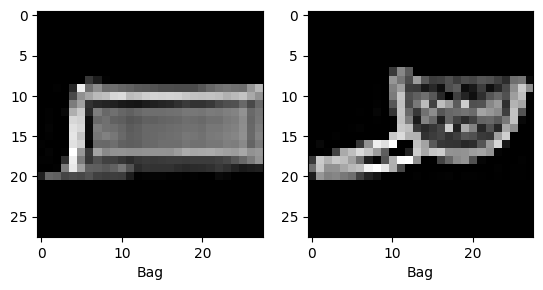

In [46]:
## Check mis-classifications (False positives)
err1 = np.where((Y2_shoe_te==0) & (y_pred==1))[0]
fig, axes = plt.subplots(1, err1.shape[0])
for i in np.arange(0, err1.shape[0]):
  axes[i].imshow(X2_te[[err1[i]]].reshape(28,28), cmap='gray')
  axes[i].set_xlabel(cat_names[Y2_te[err1[i]]])


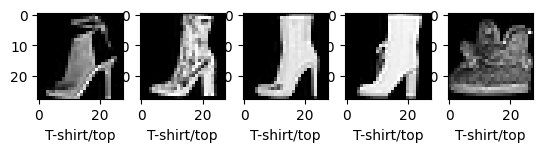

In [49]:
## Check mis-classifications (False positives)
err2 = np.where((Y2_shoe_te==1) & (y_pred==0))[0]
fig, axes = plt.subplots(1, err2.shape[0])
for i in np.arange(0, err2.shape[0]):
  axes[i].imshow(X2_te[[err2[i]]].reshape(28,28), cmap='gray')
  axes[i].set_xlabel(cat_names[y_pred[err2[i]]])


### Bonus:

- In question S4 you have a chance to discard one of image categories that are part of the non-shoe set. Which category would you prefer to discard? Explain and justify with data
